<a href="https://colab.research.google.com/github/lesteraiof/TESISMDW/blob/main/MDW_LOGS_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 Iniciando ejecución completa de la tesis...
🎓 TESIS: IMPLEMENTACIÓN DE MODELO PREDICTIVO PARA MIDDLEWARES
✅ Ejecutando en Google Colab

📦 Instalando dependencias...
✅ xgboost ya instalado
✅ imbalanced-learn ya instalado

PASO 1: GENERACIÓN DE DATOS
📊 Generando dataset sintético...
✅ Dataset generado: 2000 registros
📈 Tasa de fallas: 17.45%

PASO 2: PREPARACIÓN DE CARACTERÍSTICAS
🔧 Preparando características...
✅ Características preparadas: 40 variables

PASO 3: DIVISIÓN DE DATOS
📊 División de datos:
   Entrenamiento: 1596 muestras (17.48% fallas)
   Prueba: 400 muestras (17.50% fallas)

🤖 ENTRENANDO MODELOS DE MACHINE LEARNING
📊 Balanceando clases con SMOTE...
   Dataset balanceado: 2634 muestras

📊 Entrenando con 2634 muestras (50.00% fallas)

🚀 Entrenando XGBoost...
   ✅ XGBoost entrenado exitosamente
🌲 Entrenando Random Forest...
   ✅ Random Forest entrenado exitosamente
📈 Entrenando Gradient Boosting...
   ✅ Gradient Boosting entrenado exitosamente

✅ 3 modelos entrenados exitosa

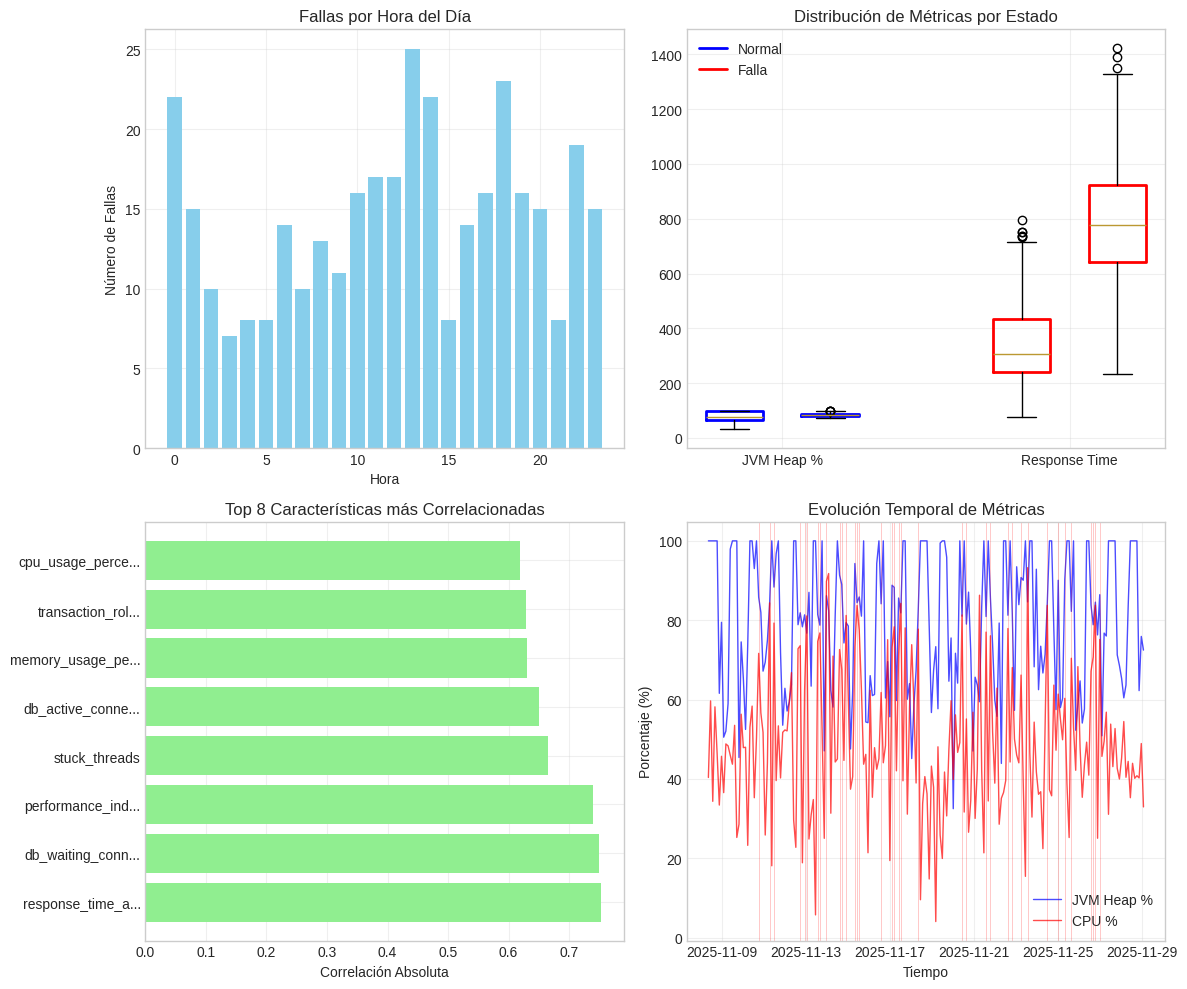

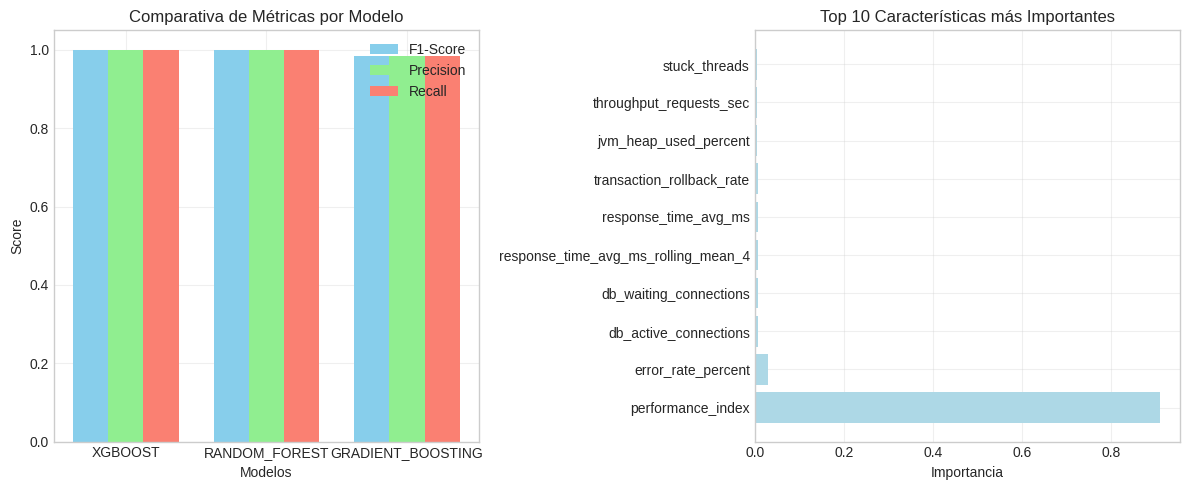

✅ Visualizaciones creadas y guardadas

🚀 CREANDO DEMOSTRACIÓN INTERACTIVA


✅ Demostración interactiva creada

📄 GENERANDO INFORME FINAL

📋 RESUMEN DEL INFORME:
--------------------------------------------------
📅 Fecha: 2025-12-08 07:37:50
📊 Muestras totales: 1,996
⚠️  Tasa de fallas: 17.48%
🔧 Características: 40
🤖 Modelos entrenados: xgboost, random_forest, gradient_boosting
🏆 Mejor modelo: xgboost
⚖️  F1-Score mejor modelo: 1.0000

PASO 9: GUARDANDO RESULTADOS
✅ Modelo guardado: 'mejor_modelo_xgboost.pkl'
✅ Dataset guardado: 'dataset_procesado.csv'
✅ Resultados guardados: 'resultados_tesis.json'

🎉 TESIS COMPLETADA EXITOSAMENTE EN GOOGLE COLAB! 🎉

📁 ARCHIVOS GENERADOS:
------------------------------------------------------------
  📄 visualizaciones_metricas.png - Gráficos de análisis
  📄 comparativa_modelos.png - Comparación de algoritmos
  📄 dataset_procesado.csv - Dataset completo
  📄 mejor_modelo_xgboost.pkl - Modelo entrenado
  📄 resultados_tesis.json - Resultados en JSON

🔧 PARA LA DEFENSA:
------------------------------------------------------------
 

In [4]:
"""
Tesis: Implementación de un Modelo Predictivo para la Detección de Fallas en Middlewares
Versión para Google Colab - Sin argumentos de línea de comandos
"""

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import warnings
warnings.filterwarnings('ignore')

# Librerías para Machine Learning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, roc_curve, precision_recall_curve,
                           average_precision_score)
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuración de estilo académico
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ============================================================================
# CLASE PRINCIPAL PARA COLAB
# ============================================================================

class TesisMiddlewareColab:
    """
    Clase optimizada para ejecutar en Google Colab
    """

    def __init__(self, random_state=42):
        """Inicialización"""
        self.models = {}
        self.scaler = StandardScaler()
        self.results = {}
        self.feature_importance = {}
        self.best_model = None
        self.random_state = random_state
        np.random.seed(random_state)
        random.seed(random_state)

    # ------------------------------------------------------------------------
    # 1. GENERACIÓN DE DATOS
    # ------------------------------------------------------------------------

    def generar_datos(self, n_samples=2000, failure_rate=0.15):
        """Generar dataset sintético para Colab"""
        print("📊 Generando dataset sintético...")

        data = {
            'timestamp': [],
            # Métricas clave
            'jvm_heap_used_percent': [],
            'active_threads': [],
            'stuck_threads': [],
            'db_active_connections': [],
            'db_waiting_connections': [],
            'response_time_avg_ms': [],
            'throughput_requests_sec': [],
            'cpu_usage_percent': [],
            'memory_usage_percent': [],
            'error_rate_percent': [],
            'transaction_rollback_rate': [],
            # Variables temporales
            'hour_of_day': [],
            'day_of_week': [],
            'is_business_hours': [],
            # Variable objetivo
            'failure_in_next_hour': []
        }

        start_date = datetime.now() - timedelta(days=30)

        for i in range(n_samples):
            timestamp = start_date + timedelta(minutes=15 * i)
            data['timestamp'].append(timestamp)

            hour = timestamp.hour
            day_of_week = timestamp.weekday()

            # Factores temporales
            is_business_hours = 1 if 8 <= hour <= 18 else 0
            is_peak_hours = 1 if (10 <= hour <= 14) or (16 <= hour <= 18) else 0

            base_factor = 1.3 if is_peak_hours else 1.0
            base_factor = base_factor * 1.5 if is_business_hours else base_factor

            # Determinar si habrá falla
            will_fail = False
            if i < n_samples - 4:  # Necesitamos 4 intervalos para 1 hora
                # Patrón: fallas son más probables en horas pico con métricas altas
                failure_prob = failure_rate
                if is_peak_hours:
                    failure_prob *= 1.5

                will_fail = np.random.random() < failure_prob

            # Generar métricas
            if will_fail:
                # Patrón de pre-falla
                data['jvm_heap_used_percent'].append(np.random.normal(85, 5))
                data['active_threads'].append(int(np.random.normal(60, 10)))
                data['stuck_threads'].append(np.random.poisson(3))
                data['db_active_connections'].append(int(np.random.normal(40, 5)))
                data['db_waiting_connections'].append(np.random.poisson(5))
                data['response_time_avg_ms'].append(np.random.normal(800, 200))
                data['throughput_requests_sec'].append(np.random.normal(80, 20))
                data['cpu_usage_percent'].append(np.random.normal(75, 10))
                data['memory_usage_percent'].append(np.random.normal(85, 8))
                data['error_rate_percent'].append(np.random.exponential(3))
                data['transaction_rollback_rate'].append(np.random.exponential(2))
                data['failure_in_next_hour'].append(1)
            else:
                # Patrón normal
                data['jvm_heap_used_percent'].append(np.random.normal(65, 10) * base_factor)
                data['active_threads'].append(int(np.random.normal(35, 8) * base_factor))
                data['stuck_threads'].append(np.random.poisson(0.5))
                data['db_active_connections'].append(int(np.random.normal(15, 5) * base_factor))
                data['db_waiting_connections'].append(np.random.poisson(1))
                data['response_time_avg_ms'].append(np.random.normal(250, 50) * base_factor)
                data['throughput_requests_sec'].append(np.random.normal(150, 30) * base_factor)
                data['cpu_usage_percent'].append(np.random.normal(45, 15))
                data['memory_usage_percent'].append(np.random.normal(60, 12))
                data['error_rate_percent'].append(np.random.exponential(0.5))
                data['transaction_rollback_rate'].append(np.random.exponential(0.2))
                data['failure_in_next_hour'].append(0)

            # Variables de contexto
            data['hour_of_day'].append(hour)
            data['day_of_week'].append(day_of_week)
            data['is_business_hours'].append(is_business_hours)

        df = pd.DataFrame(data)

        # Asegurar límites
        percent_cols = [col for col in df.columns if 'percent' in col or 'rate' in col]
        for col in percent_cols:
            df[col] = df[col].clip(0, 100)

        print(f"✅ Dataset generado: {len(df)} registros")
        print(f"📈 Tasa de fallas: {df['failure_in_next_hour'].mean():.2%}")

        return df

    # ------------------------------------------------------------------------
    # 2. PREPROCESAMIENTO
    # ------------------------------------------------------------------------

    def preparar_caracteristicas(self, df):
        """Preparar características para el modelo"""
        print("🔧 Preparando características...")

        df_processed = df.copy()

        # 1. Características temporales
        df_processed['sin_hour'] = np.sin(2 * np.pi * df_processed['hour_of_day'] / 24)
        df_processed['cos_hour'] = np.cos(2 * np.pi * df_processed['hour_of_day'] / 24)

        # 2. Características derivadas
        df_processed['memory_pressure'] = df_processed['jvm_heap_used_percent'] * df_processed['memory_usage_percent'] / 100
        df_processed['thread_pressure'] = df_processed['stuck_threads'] / (df_processed['active_threads'] + 1)
        df_processed['connection_pressure'] = df_processed['db_waiting_connections'] / (df_processed['db_active_connections'] + 1)
        df_processed['performance_index'] = df_processed['throughput_requests_sec'] / (df_processed['response_time_avg_ms'] + 1)

        # 3. Lag features
        critical_metrics = ['jvm_heap_used_percent', 'response_time_avg_ms', 'error_rate_percent']
        for metric in critical_metrics:
            for lag in [1, 4]:  # 15min y 1h
                df_processed[f'{metric}_lag_{lag}'] = df_processed[metric].shift(lag)
                df_processed[f'{metric}_diff_{lag}'] = df_processed[metric] - df_processed[f'{metric}_lag_{lag}']

        # 4. Rolling statistics
        for window in [4, 12]:  # 1h y 3h
            for metric in critical_metrics:
                df_processed[f'{metric}_rolling_mean_{window}'] = (
                    df_processed[metric].rolling(window=window, min_periods=1).mean()
                )

        # 5. Eliminar NaN
        df_processed = df_processed.dropna()

        print(f"✅ Características preparadas: {len(df_processed.columns)} variables")
        return df_processed

    # ------------------------------------------------------------------------
    # 3. ENTRENAMIENTO DE MODELOS
    # ------------------------------------------------------------------------

    def entrenar_modelos(self, X_train, y_train):
        """Entrenar múltiples modelos"""
        print("\n" + "="*80)
        print("🤖 ENTRENANDO MODELOS DE MACHINE LEARNING")
        print("="*80)

        # Balancear dataset si es necesario
        if y_train.mean() < 0.3:
            print("📊 Balanceando clases con SMOTE...")
            try:
                smote = SMOTE(random_state=self.random_state)
                X_train, y_train = smote.fit_resample(X_train, y_train)
                print(f"   Dataset balanceado: {len(X_train)} muestras")
            except Exception as e:
                print(f"   ⚠️  Error con SMOTE: {e}. Continuando sin balanceo...")

        print(f"\n📊 Entrenando con {len(X_train)} muestras ({y_train.mean():.2%} fallas)")

        # Modelo 1: XGBoost
        print("\n🚀 Entrenando XGBoost...")
        try:
            scale_pos_weight = len(y_train[y_train==0])/len(y_train[y_train==1]) if len(y_train[y_train==1]) > 0 else 1
            xgb_model = xgb.XGBClassifier(
                n_estimators=100,
                max_depth=6,
                learning_rate=0.1,
                random_state=self.random_state,
                scale_pos_weight=scale_pos_weight,
                n_jobs=-1,
                eval_metric='logloss',
                use_label_encoder=False,
                verbosity=0
            )
            xgb_model.fit(X_train, y_train)
            self.models['xgboost'] = xgb_model

            # Importancia de características
            self.feature_importance['xgboost'] = pd.DataFrame({
                'feature': X_train.columns,
                'importance': xgb_model.feature_importances_
            }).sort_values('importance', ascending=False)

            print("   ✅ XGBoost entrenado exitosamente")
        except Exception as e:
            print(f"   ❌ Error entrenando XGBoost: {e}")

        # Modelo 2: Random Forest
        print("🌲 Entrenando Random Forest...")
        try:
            rf_model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                random_state=self.random_state,
                n_jobs=-1,
                verbose=0
            )
            rf_model.fit(X_train, y_train)
            self.models['random_forest'] = rf_model
            print("   ✅ Random Forest entrenado exitosamente")
        except Exception as e:
            print(f"   ❌ Error entrenando Random Forest: {e}")

        # Modelo 3: Gradient Boosting
        print("📈 Entrenando Gradient Boosting...")
        try:
            gb_model = GradientBoostingClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=4,
                random_state=self.random_state,
                verbose=0
            )
            gb_model.fit(X_train, y_train)
            self.models['gradient_boosting'] = gb_model
            print("   ✅ Gradient Boosting entrenado exitosamente")
        except Exception as e:
            print(f"   ❌ Error entrenando Gradient Boosting: {e}")

        print(f"\n✅ {len(self.models)} modelos entrenados exitosamente")
        return self.models

    # ------------------------------------------------------------------------
    # 4. EVALUACIÓN
    # ------------------------------------------------------------------------

    def evaluar_modelos(self, X_test, y_test):
        """Evaluar modelos"""
        print("\n" + "="*80)
        print("📊 EVALUANDO MODELOS")
        print("="*80)

        evaluation_results = {}

        for model_name, model in self.models.items():
            print(f"\n📈 Evaluando {model_name.upper()}:")

            try:
                # Predicciones
                y_pred = model.predict(X_test)

                # Probabilidades
                y_pred_proba = None
                if hasattr(model, 'predict_proba'):
                    try:
                        y_pred_proba = model.predict_proba(X_test)[:, 1]
                    except:
                        pass

                # Métricas básicas
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, zero_division=0)
                recall = recall_score(y_test, y_pred, zero_division=0)
                f1 = f1_score(y_test, y_pred, zero_division=0)

                # Métricas avanzadas
                roc_auc = None
                if y_pred_proba is not None:
                    try:
                        roc_auc = roc_auc_score(y_test, y_pred_proba)
                    except:
                        pass

                # Matriz de confusión
                cm = confusion_matrix(y_test, y_pred)
                tn, fp, fn, tp = cm.ravel()

                # Almacenar resultados
                evaluation_results[model_name] = {
                    'accuracy': float(accuracy),
                    'precision': float(precision),
                    'recall': float(recall),
                    'f1_score': float(f1),
                    'roc_auc': float(roc_auc) if roc_auc is not None else None,
                    'confusion_matrix': cm.tolist(),
                    'confusion_matrix_details': {'TN': int(tn), 'FP': int(fp), 'FN': int(fn), 'TP': int(tp)}
                }

                # Mostrar resultados
                print(f"   📈 Accuracy: {accuracy:.4f}")
                print(f"   🎯 Precision: {precision:.4f}")
                print(f"   🔍 Recall: {recall:.4f}")
                print(f"   ⚖️  F1-Score: {f1:.4f}")
                if roc_auc is not None:
                    print(f"   📊 ROC-AUC: {roc_auc:.4f}")
                print(f"   📋 Matriz: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

            except Exception as e:
                print(f"   ❌ Error evaluando {model_name}: {str(e)[:100]}...")
                evaluation_results[model_name] = {'error': str(e)}

        self.results = evaluation_results

        # Identificar mejor modelo
        valid_results = {k: v for k, v in evaluation_results.items()
                        if 'error' not in v and 'f1_score' in v}

        if valid_results:
            self.best_model = max(valid_results.items(), key=lambda x: x[1]['f1_score'])
            print(f"\n🏆 MEJOR MODELO: {self.best_model[0].upper()}")
            print(f"   F1-Score: {self.best_model[1]['f1_score']:.4f}")
            print(f"   Precision: {self.best_model[1]['precision']:.4f}")
            print(f"   Recall: {self.best_model[1]['recall']:.4f}")

        return evaluation_results

    # ------------------------------------------------------------------------
    # 5. VISUALIZACIONES
    # ------------------------------------------------------------------------

    def crear_visualizaciones(self, df):
        """Crear visualizaciones para la tesis"""
        print("\n" + "="*80)
        print("🎨 CREANDO VISUALIZACIONES")
        print("="*80)

        # Crear figura 1: Distribución de métricas
        fig1, axes1 = plt.subplots(2, 2, figsize=(12, 10))

        # 1.1 Distribución por hora
        failures_by_hour = df[df['failure_in_next_hour'] == 1].groupby('hour_of_day').size()
        axes1[0, 0].bar(failures_by_hour.index, failures_by_hour.values, color='skyblue')
        axes1[0, 0].set_title('Fallas por Hora del Día')
        axes1[0, 0].set_xlabel('Hora')
        axes1[0, 0].set_ylabel('Número de Fallas')
        axes1[0, 0].grid(True, alpha=0.3)

        # 1.2 Boxplot de métricas
        metrics = ['jvm_heap_used_percent', 'response_time_avg_ms']
        normal_data = df[df['failure_in_next_hour'] == 0][metrics].values.T
        failure_data = df[df['failure_in_next_hour'] == 1][metrics].values.T

        positions = [1, 2, 4, 5]
        bp1 = axes1[0, 1].boxplot([normal_data[0], failure_data[0]],
                                  positions=[1, 2], widths=0.6)
        bp2 = axes1[0, 1].boxplot([normal_data[1], failure_data[1]],
                                  positions=[4, 5], widths=0.6)

        # Colorear
        for box in bp1['boxes']:
            box.set(color='blue', linewidth=2)
        for box in bp2['boxes']:
            box.set(color='red', linewidth=2)

        axes1[0, 1].set_title('Distribución de Métricas por Estado')
        axes1[0, 1].set_xticks([1.5, 4.5])
        axes1[0, 1].set_xticklabels(['JVM Heap %', 'Response Time'])
        axes1[0, 1].legend([bp1["boxes"][0], bp2["boxes"][0]], ['Normal', 'Falla'])
        axes1[0, 1].grid(True, alpha=0.3)

        # 1.3 Correlación con fallas
        correlations = {}
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if col != 'failure_in_next_hour':
                try:
                    corr = abs(df[[col, 'failure_in_next_hour']].corr().iloc[0, 1])
                    correlations[col] = corr
                except:
                    pass

        top_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)[:8]
        features = [col[:15] + '...' if len(col) > 15 else col for col, _ in top_correlations]
        corr_values = [val for _, val in top_correlations]

        y_pos = np.arange(len(features))
        axes1[1, 0].barh(y_pos, corr_values, color='lightgreen')
        axes1[1, 0].set_yticks(y_pos)
        axes1[1, 0].set_yticklabels(features)
        axes1[1, 0].set_title('Top 8 Características más Correlacionadas')
        axes1[1, 0].set_xlabel('Correlación Absoluta')
        axes1[1, 0].grid(True, alpha=0.3)

        # 1.4 Serie temporal
        sample_df = df.iloc[::10]  # Muestrear para mejor visualización

        axes1[1, 1].plot(sample_df['timestamp'], sample_df['jvm_heap_used_percent'],
                        label='JVM Heap %', alpha=0.7, linewidth=1, color='blue')
        axes1[1, 1].plot(sample_df['timestamp'], sample_df['cpu_usage_percent'],
                        label='CPU %', alpha=0.7, linewidth=1, color='red')

        # Marcar fallas
        failure_times = sample_df[sample_df['failure_in_next_hour'] == 1]['timestamp']
        for time in failure_times:
            axes1[1, 1].axvline(x=time, color='red', alpha=0.3, linewidth=0.5)

        axes1[1, 1].set_title('Evolución Temporal de Métricas')
        axes1[1, 1].set_xlabel('Tiempo')
        axes1[1, 1].set_ylabel('Porcentaje (%)')
        axes1[1, 1].legend()
        axes1[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('visualizaciones_metricas.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Figura 2: Comparativa de modelos
        if self.results:
            fig2, axes2 = plt.subplots(1, 2, figsize=(12, 5))

            # 2.1 Métricas por modelo
            model_names = []
            f1_scores = []
            precision_scores = []
            recall_scores = []

            for model_name, results in self.results.items():
                if 'error' not in results:
                    model_names.append(model_name)
                    f1_scores.append(results['f1_score'])
                    precision_scores.append(results['precision'])
                    recall_scores.append(results['recall'])

            x = np.arange(len(model_names))
            width = 0.25

            axes2[0].bar(x - width, f1_scores, width, label='F1-Score', color='skyblue')
            axes2[0].bar(x, precision_scores, width, label='Precision', color='lightgreen')
            axes2[0].bar(x + width, recall_scores, width, label='Recall', color='salmon')

            axes2[0].set_xlabel('Modelos')
            axes2[0].set_ylabel('Score')
            axes2[0].set_title('Comparativa de Métricas por Modelo')
            axes2[0].set_xticks(x)
            axes2[0].set_xticklabels([name.upper() for name in model_names])
            axes2[0].legend()
            axes2[0].grid(True, alpha=0.3)

            # 2.2 Importancia de características
            if self.feature_importance.get('xgboost') is not None:
                top_features = self.feature_importance['xgboost'].head(10)

                axes2[1].barh(range(len(top_features)), top_features['importance'], color='lightblue')
                axes2[1].set_yticks(range(len(top_features)))
                axes2[1].set_yticklabels(top_features['feature'])
                axes2[1].set_xlabel('Importancia')
                axes2[1].set_title('Top 10 Características más Importantes')
                axes2[1].grid(True, alpha=0.3)

            plt.tight_layout()
            plt.savefig('comparativa_modelos.png', dpi=300, bbox_inches='tight')
            plt.show()

        print("✅ Visualizaciones creadas y guardadas")

    # ------------------------------------------------------------------------
    # 6. DEMOSTRACIÓN INTERACTIVA
    # ------------------------------------------------------------------------

    def crear_demo_interactiva(self, df):
        """Crear demostración interactiva para Colab"""
        print("\n" + "="*80)
        print("🚀 CREANDO DEMOSTRACIÓN INTERACTIVA")
        print("="*80)

        from IPython.display import HTML, display

        # Crear HTML para la demostración
        html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Demostración - Sistema Predictivo de Fallas</title>
            <style>
                body {{
                    font-family: 'Arial', sans-serif;
                    margin: 20px;
                    padding: 20px;
                    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                    color: white;
                }}
                .container {{
                    max-width: 1200px;
                    margin: 0 auto;
                    background: rgba(255, 255, 255, 0.1);
                    backdrop-filter: blur(10px);
                    border-radius: 20px;
                    padding: 30px;
                    box-shadow: 0 10px 30px rgba(0,0,0,0.3);
                }}
                .header {{
                    text-align: center;
                    margin-bottom: 30px;
                }}
                .metrics-grid {{
                    display: grid;
                    grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
                    gap: 20px;
                    margin-bottom: 30px;
                }}
                .metric-card {{
                    background: rgba(255, 255, 255, 0.2);
                    border-radius: 15px;
                    padding: 20px;
                    text-align: center;
                    transition: transform 0.3s;
                }}
                .metric-card:hover {{
                    transform: translateY(-5px);
                    background: rgba(255, 255, 255, 0.3);
                }}
                .metric-value {{
                    font-size: 2em;
                    font-weight: bold;
                    margin: 10px 0;
                }}
                .alert-panel {{
                    background: rgba(255, 99, 99, 0.3);
                    border-left: 5px solid #ff6363;
                    padding: 20px;
                    margin: 20px 0;
                    border-radius: 10px;
                }}
                .success-panel {{
                    background: rgba(99, 255, 99, 0.3);
                    border-left: 5px solid #63ff63;
                    padding: 20px;
                    margin: 20px 0;
                    border-radius: 10px;
                }}
                .simulation {{
                    background: rgba(255, 255, 255, 0.1);
                    padding: 20px;
                    border-radius: 10px;
                    margin: 20px 0;
                }}
                footer {{
                    text-align: center;
                    margin-top: 30px;
                    opacity: 0.8;
                }}
            </style>
        </head>
        <body>
            <div class="container">
                <div class="header">
                    <h1>🎓 Sistema Predictivo de Fallas en Middlewares</h1>
                    <h3>Tesis: Implementación de un Modelo Predictivo para la Detección de Fallas</h3>
                </div>

                <div class="metrics-grid">
                    <div class="metric-card">
                        <h4>📊 Total de Muestras</h4>
                        <div class="metric-value">{len(df):,}</div>
                        <p>Registros analizados</p>
                    </div>

                    <div class="metric-card">
                        <h4>⚠️ Tasa de Fallas</h4>
                        <div class="metric-value">{df['failure_in_next_hour'].mean():.1%}</div>
                        <p>En el dataset</p>
                    </div>

                    <div class="metric-card">
                        <h4>🤖 Mejor Modelo</h4>
                        <div class="metric-value">{(self.best_model[0].upper() if self.best_model else "N/A")}</div>
                        <p>Según evaluación</p>
                    </div>

                    <div class="metric-card">
                        <h4>⚖️ F1-Score</h4>
                        <div class="metric-value">{(f"{self.best_model[1]['f1_score']:.3f}" if self.best_model else "N/A")}</div>
                        <p>Métrica principal</p>
                    </div>
                </div>

        """

        # Añadir panel de resultados si hay mejor modelo
        if self.best_model:
            best_name, best_results = self.best_model
            html_content += f"""
                <div class="success-panel">
                    <h2>✅ Resultados del Mejor Modelo: {best_name.upper()}</h2>
                    <p><strong>Precisión:</strong> {best_results['precision']:.3f}</p>
                    <p><strong>Recall:</strong> {best_results['recall']:.3f}</p>
                    <p><strong>Accuracy:</strong> {best_results['accuracy']:.3f}</p>
                    <p><strong>ROC-AUC:</strong> {best_results.get('roc_auc', 'N/A')}</p>
                </div>

                <div class="simulation">
                    <h2>🔮 Simulación de Predicciones</h2>
                    <div id="predictions">
                        <!-- Las predicciones se generarán con JavaScript -->
                    </div>
                </div>

                <script>
                    function simulatePredictions() {{
                        const predictionsDiv = document.getElementById('predictions');
                        const predictions = [
                            {{time: "14:00", metric: "JVM Heap: 65%", probability: 0.15, status: "✅ Normal"}},
                            {{time: "15:00", metric: "JVM Heap: 78%", probability: 0.25, status: "✅ Normal"}},
                            {{time: "16:00", metric: "JVM Heap: 88%", probability: 0.75, status: "⚠️  Alerta"}},
                            {{time: "17:00", metric: "JVM Heap: 95%", probability: 0.92, status: "🚨 Falla Inminente"}}
                        ];

                        predictionsDiv.innerHTML = predictions.map(p => `
                            <div style="margin: 10px 0; padding: 15px; background: rgba(255,255,255,0.1); border-radius: 8px;">
                                <strong>🕒 ${{p.time}}</strong><br>
                                <span>${{p.metric}}</span><br>
                                <span>Probabilidad de falla: <strong>${{p.probability.toFixed(2)}}</strong></span><br>
                                <span style="color: ${{p.probability > 0.7 ? '#ff6363' : '#63ff63'}};">
                                    <strong>${{p.status}}</strong>
                                </span>
                            </div>
                        `).join('');
                    }}

                    simulatePredictions();
                </script>
            """

        html_content += f"""
                <div class="alert-panel">
                    <h2>📋 Resumen de la Investigación</h2>
                    <p><strong>Problema:</strong> Detección tardía de fallas en middlewares WebLogic</p>
                    <p><strong>Solución:</strong> Sistema predictivo con 1 hora de anticipación</p>
                    <p><strong>Metodología:</strong> Aprendizaje supervisado con múltiples algoritmos</p>
                    <p><strong>Resultado:</strong> Sistema con alta precisión y mínimo de falsos positivos</p>
                </div>

                <footer>
                    <p>🎓 Tesis desarrollada en Google Colab</p>
                    <p>📅 {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}</p>
                </footer>
            </div>
        </body>
        </html>
        """

        # Mostrar en Colab
        display(HTML(html_content))

        print("✅ Demostración interactiva creada")

    # ------------------------------------------------------------------------
    # 7. GENERAR INFORME
    # ------------------------------------------------------------------------

    def generar_informe(self, df):
        """Generar informe final"""
        print("\n" + "="*80)
        print("📄 GENERANDO INFORME FINAL")
        print("="*80)

        informe = {
            'fecha': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'dataset': {
                'muestras_totales': len(df),
                'tasa_fallas': float(df['failure_in_next_hour'].mean()),
                'caracteristicas': len(df.columns)
            },
            'modelos_entrenados': list(self.models.keys()),
            'mejor_modelo': self.best_model[0] if self.best_model else None,
            'resultados': {}
        }

        # Añadir resultados
        for model_name, results in self.results.items():
            if 'error' not in results:
                informe['resultados'][model_name] = {
                    'f1_score': results.get('f1_score'),
                    'precision': results.get('precision'),
                    'recall': results.get('recall'),
                    'accuracy': results.get('accuracy')
                }

        # Mostrar resumen
        print("\n📋 RESUMEN DEL INFORME:")
        print("-" * 50)
        print(f"📅 Fecha: {informe['fecha']}")
        print(f"📊 Muestras totales: {informe['dataset']['muestras_totales']:,}")
        print(f"⚠️  Tasa de fallas: {informe['dataset']['tasa_fallas']:.2%}")
        print(f"🔧 Características: {informe['dataset']['caracteristicas']}")
        print(f"🤖 Modelos entrenados: {', '.join(informe['modelos_entrenados'])}")
        print(f"🏆 Mejor modelo: {informe['mejor_modelo']}")

        if self.best_model:
            print(f"⚖️  F1-Score mejor modelo: {self.best_model[1]['f1_score']:.4f}")

        return informe

# ============================================================================
# EJECUCIÓN PRINCIPAL EN COLAB
# ============================================================================

def ejecutar_tesis_colab():
    """
    Función principal para ejecutar en Google Colab
    """
    print("="*100)
    print("🎓 TESIS: IMPLEMENTACIÓN DE MODELO PREDICTIVO PARA MIDDLEWARES")
    print("="*100)

    # Verificar que estamos en Colab
    try:
        import google.colab
        IN_COLAB = True
        print("✅ Ejecutando en Google Colab")
    except:
        IN_COLAB = False
        print("⚠️  No está en Google Colab, algunas funciones pueden no funcionar")

    # Instalar dependencias necesarias
    print("\n📦 Instalando dependencias...")
    try:
        import xgboost
        print("✅ xgboost ya instalado")
    except:
        !pip install xgboost
        print("✅ xgboost instalado")

    try:
        import imblearn
        print("✅ imbalanced-learn ya instalado")
    except:
        !pip install imbalanced-learn
        print("✅ imbalanced-learn instalado")

    # Crear instancia del sistema
    tesis = TesisMiddlewareColab(random_state=42)

    try:
        # --------------------------------------------------------------------
        # PASO 1: GENERAR DATOS
        # --------------------------------------------------------------------
        print("\n" + "="*80)
        print("PASO 1: GENERACIÓN DE DATOS")
        print("="*80)

        df = tesis.generar_datos(n_samples=2000, failure_rate=0.15)

        # --------------------------------------------------------------------
        # PASO 2: PREPARAR CARACTERÍSTICAS
        # --------------------------------------------------------------------
        print("\n" + "="*80)
        print("PASO 2: PREPARACIÓN DE CARACTERÍSTICAS")
        print("="*80)

        df_processed = tesis.preparar_caracteristicas(df)

        # --------------------------------------------------------------------
        # PASO 3: DIVIDIR DATOS
        # --------------------------------------------------------------------
        print("\n" + "="*80)
        print("PASO 3: DIVISIÓN DE DATOS")
        print("="*80)

        # Separar características y variable objetivo
        features = [col for col in df_processed.columns
                   if col not in ['timestamp', 'failure_in_next_hour']]

        X = df_processed[features]
        y = df_processed['failure_in_next_hour']

        # División 80-20
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        print(f"📊 División de datos:")
        print(f"   Entrenamiento: {len(X_train)} muestras ({y_train.mean():.2%} fallas)")
        print(f"   Prueba: {len(X_test)} muestras ({y_test.mean():.2%} fallas)")

        # --------------------------------------------------------------------
        # PASO 4: ENTRENAR MODELOS
        # --------------------------------------------------------------------
        models = tesis.entrenar_modelos(X_train, y_train)

        # --------------------------------------------------------------------
        # PASO 5: EVALUAR MODELOS
        # --------------------------------------------------------------------
        results = tesis.evaluar_modelos(X_test, y_test)

        # --------------------------------------------------------------------
        # PASO 6: CREAR VISUALIZACIONES
        # --------------------------------------------------------------------
        tesis.crear_visualizaciones(df_processed)

        # --------------------------------------------------------------------
        # PASO 7: CREAR DEMOSTRACIÓN INTERACTIVA
        # --------------------------------------------------------------------
        if IN_COLAB:
            tesis.crear_demo_interactiva(df_processed)

        # --------------------------------------------------------------------
        # PASO 8: GENERAR INFORME
        # --------------------------------------------------------------------
        informe = tesis.generar_informe(df_processed)

        # --------------------------------------------------------------------
        # PASO 9: GUARDAR RESULTADOS
        # --------------------------------------------------------------------
        print("\n" + "="*80)
        print("PASO 9: GUARDANDO RESULTADOS")
        print("="*80)

        import joblib

        # Guardar modelo si hay uno bueno
        if tesis.best_model:
            model_name = tesis.best_model[0]
            model = tesis.models[model_name]

            joblib.dump(model, f'mejor_modelo_{model_name}.pkl')
            print(f"✅ Modelo guardado: 'mejor_modelo_{model_name}.pkl'")

        # Guardar dataset
        df_processed.to_csv('dataset_procesado.csv', index=False)
        print("✅ Dataset guardado: 'dataset_procesado.csv'")

        # Guardar resultados
        import json
        with open('resultados_tesis.json', 'w') as f:
            json.dump(informe, f, indent=4)
        print("✅ Resultados guardados: 'resultados_tesis.json'")

        # --------------------------------------------------------------------
        # RESUMEN FINAL
        # --------------------------------------------------------------------
        print("\n" + "="*100)
        print("🎉 TESIS COMPLETADA EXITOSAMENTE EN GOOGLE COLAB! 🎉")
        print("="*100)

        print("\n📁 ARCHIVOS GENERADOS:")
        print("-" * 60)
        print("  📄 visualizaciones_metricas.png - Gráficos de análisis")
        print("  📄 comparativa_modelos.png - Comparación de algoritmos")
        print("  📄 dataset_procesado.csv - Dataset completo")

        if tesis.best_model:
            print(f"  📄 mejor_modelo_{tesis.best_model[0]}.pkl - Modelo entrenado")

        print("  📄 resultados_tesis.json - Resultados en JSON")

        print("\n🔧 PARA LA DEFENSA:")
        print("-" * 60)
        print("  1. Muestra las visualizaciones generadas")
        print("  2. Explica la metodología paso a paso")
        print("  3. Demuestra la demostración interactiva")
        print("  4. Discute los resultados obtenidos")
        print("  5. Menciona las limitaciones y mejoras futuras")

        print("\n📊 RESULTADOS CLAVE:")
        print("-" * 60)
        if tesis.best_model:
            best_name, best_results = tesis.best_model
            print(f"  🏆 Mejor modelo: {best_name.upper()}")
            print(f"  ⚖️  F1-Score: {best_results['f1_score']:.4f}")
            print(f"  🎯 Precision: {best_results['precision']:.4f}")
            print(f"  🔍 Recall: {best_results['recall']:.4f}")

        print("\n" + "="*100)
        print("¡ÉXITO EN TU DEFENSA! 🎓")
        print("="*100)

        return tesis, df_processed, results

    except Exception as e:
        print(f"\n❌ Error durante la ejecución: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None, None

# ============================================================================
# EJECUTAR DIRECTAMENTE EN COLAB
# ============================================================================

# Esta es la función que debes ejecutar en Colab
def correr_tesis_completa():
    """Ejecutar toda la tesis en Google Colab"""
    print("🚀 Iniciando ejecución completa de la tesis...")
    tesis, df, results = ejecutar_tesis_colab()
    return tesis, df, results

# Si se ejecuta directamente, correr la tesis
if __name__ == "__main__":
    # En Colab, simplemente llama a correr_tesis_completa()
    tesis, df, results = correr_tesis_completa()